In [158]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [203]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# list_center = [[1,0.5,1],(1,0.5,1), (1,0.5,1),(1,0.5,1),(1,0.5,1)]
# list_radius = [0.1,0.2,0.3,0.4,0.5]

def plt_sphere(list_center, list_radius):
  for c, r in zip(list_center, list_radius):
#     ax = fig.gca(projection='3d')

    # draw sphere
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
    x = r*np.cos(u)*np.sin(v)
    y = r*np.sin(u)*np.sin(v)
    z = r*np.cos(v)
    
    # make the sphere plot
    ax.plot_surface(x+c[0], y+c[1], z+c[2], color=np.random.choice(['r']), alpha=0.15)

    

In [159]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [282]:
# create a sequence of alphas and deltas via the relationship above
alpha_sequence = np.linspace(0.000001, 1, num=20, endpoint=False)
alpha_sequence = np.array([1e-6, 1e-5, 1e-4, 1e-3, 1e-2] + list(alpha_sequence[1:]))
alpha_sequence = np.array([1e-30, 1e-28, 1e-25, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10])
# data noise level 
SIGMA_2 = 0.1

delta_comp = lambda alpha: -2 * SIGMA_2 * np.log(alpha)

delta_sequence = [delta_comp(alpha_i) for alpha_i in alpha_sequence]

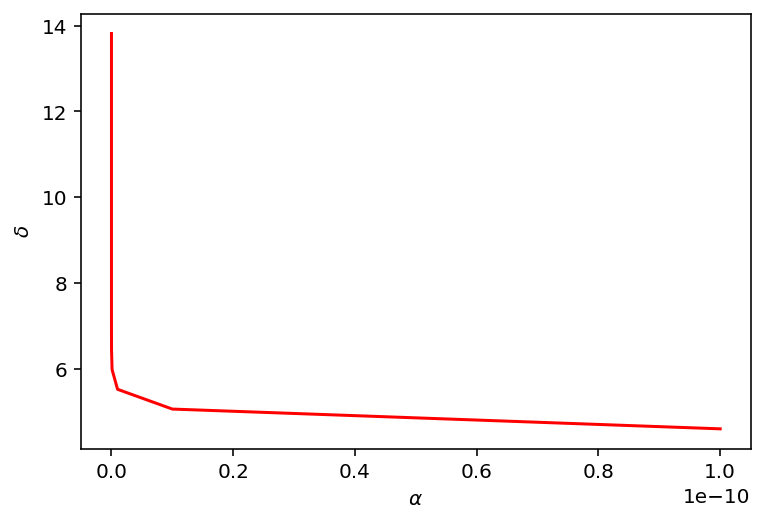

In [283]:
plt.plot(alpha_sequence, delta_sequence, 'r')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\delta$')
# plt.ylabel("$\beta_{\alpha}")
plt.show()

In [284]:
# compute beta_alpha values
beta_alpha_comp = lambda alpha: 1 - stats.chi2(df=100).cdf(-2 * np.log(alpha))

beta_alphas = [beta_alpha_comp(alpha_i) for alpha_i in alpha_sequence]

In [285]:
beta_alphas

[0.006922228490730875,
 0.027228540117617217,
 0.1430408265386789,
 0.8095172983565143,
 0.8922483607812062,
 0.9468377404236998,
 0.9776081781314095,
 0.9921442411077599,
 0.9977697453121073,
 0.9995050424389541,
 0.9999176863981454,
 0.9999902692088025,
 0.9999992355927991]

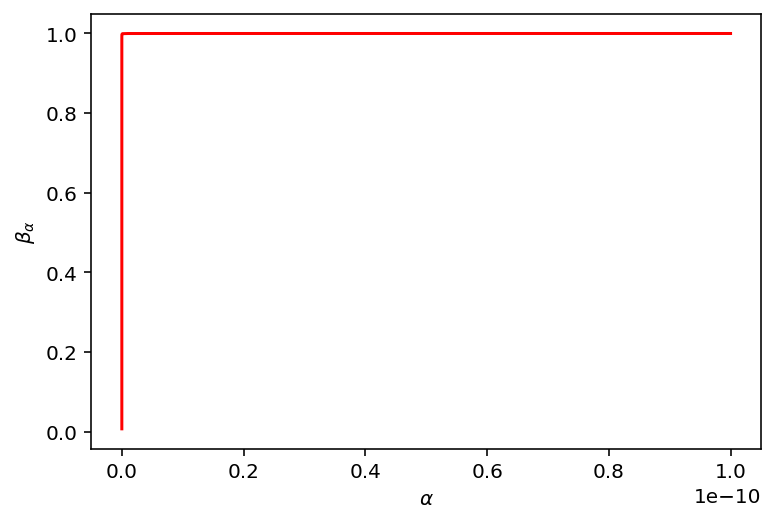

In [286]:
plt.plot(alpha_sequence, beta_alphas, 'r')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$$_\alpha$')
# plt.ylabel("$\beta_{\alpha}")
plt.show()

In [227]:
# load the run results 
list_center = np.load("/Users/mahdy/Projects/Caltech/jplmlia/track_center.npy")
list_radius = np.load("/Users/mahdy/Projects/Caltech/jplmlia/track_radius.npy")

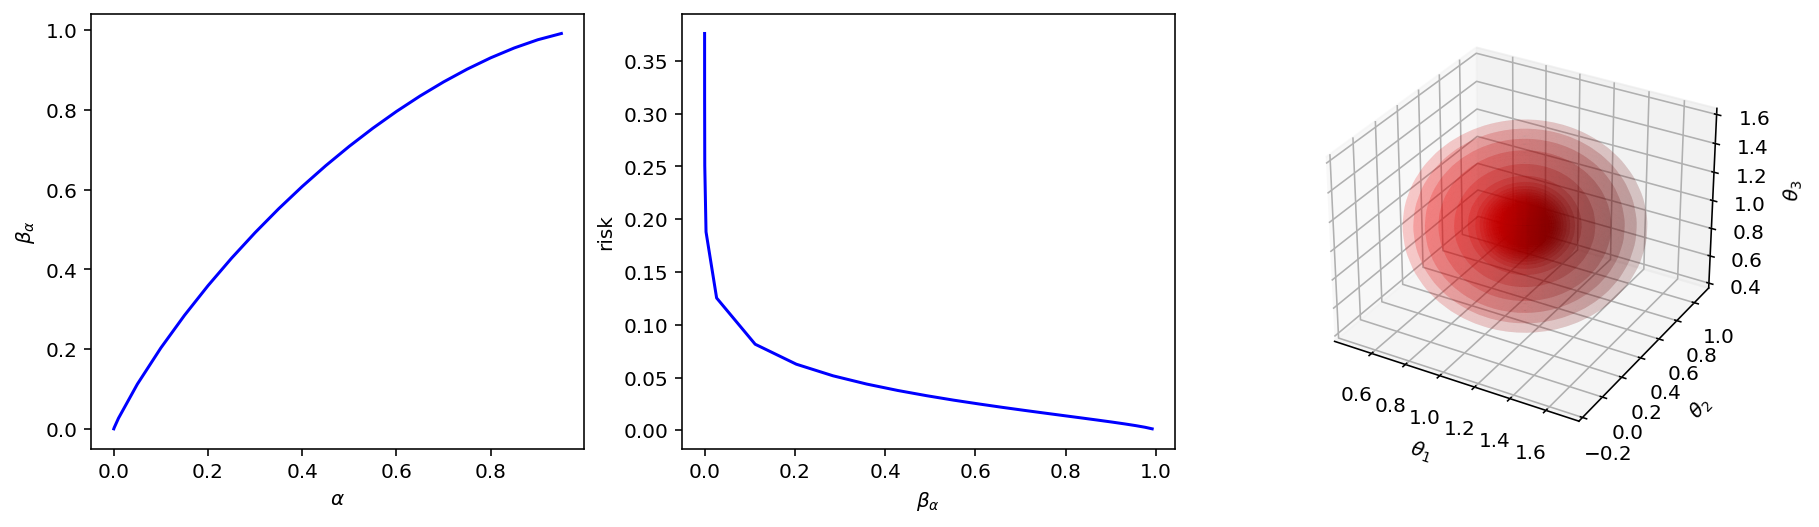

In [244]:
fig = plt.figure(figsize=(15,4))


ax = plt.subplot(1,3,1)
ax.plot(alpha_sequence, beta_alphas, 'b')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$$_\alpha$')
# plt.ylabel("$\beta_{\alpha}")

ax = plt.subplot(1,3,2)
ax.plot(beta_alphas, tracking_radius, 'b')
ax.set_xlabel(r'$\beta$$_\alpha$')
ax.set_ylabel(r'risk')
# plt.ylabel("$\beta_{\alpha}")

ax = plt.subplot(1,3,3, projection='3d')


for c, r in zip(list_center, list_radius):
#     ax = fig.gca(projection='3d')
    
    r = np.sqrt(r)
    # draw sphere
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
    x = r*np.cos(u)*np.sin(v)
    y = r*np.sin(u)*np.sin(v)
    z = r*np.cos(v)
    
    # make the sphere plot
    ax.plot_surface(x+c[0], y+c[1], z+c[2], color=np.random.choice(['r']), alpha=0.1)
ax.set_xlabel(r"$\theta$$_1$")
ax.set_ylabel(r"$\theta$$_2$")
ax.set_zlabel(r"$\theta$$_3$")
ax.plot3D(list_center[0][0],list_center[0][1],list_center[0][2],'.k')


plt.show()

In [248]:
def compute_M_delta(sigma_2, mle_error, df, man_delta=None, conf_level=0.95):
    """Support chi-sq method and manual delta set"""
    if man_delta:
        delta = man_delta
    else:
        gamma = stats.chi2(df=df).ppf(conf_level)  # find the chi-sq quantile
        delta = gamma * sigma_2

    return mle_error + delta

compute_M_delta(sigma_2=0.1, mle_error=0, df=3, man_delta=None, conf_level=0.95)

0.781472790325118

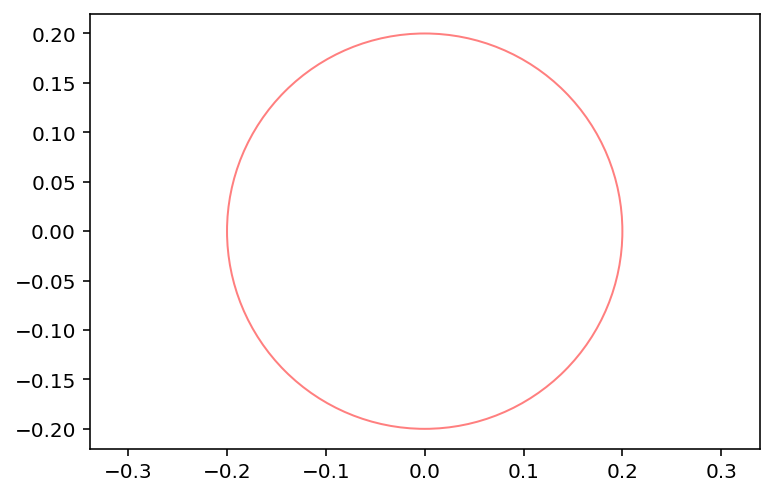

In [86]:

import matplotlib.pyplot as plt

circle = plt.Circle((0, 0), 0.2, color='r', alpha=0.5, fill=False)
           
fig, ax = plt.subplots()
ax.add_patch(circle)
# ax.add_patch(plt.Circle((1, 1), 0.5, color='#00ffff', alpha=0.5))
# ax.add_artist(plt.Circle((1, 0), 0.5, color='#000033', alpha=0.5))

#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()

In [250]:
def model(x, theta):
    """
    Creates the noise free observation at x
    """
    x_vec = x ** np.array([0, 1, 2])

    return np.dot(theta, x_vec)

def forward_model(theta, x):
    """
    Forward model version of the above model() where the
    data are assumed
    """
    N = x.shape[0]
    y = np.zeros(N)
    for i in range(N):
        y[i] = model(x=x[i], theta=theta)

    return y


In [257]:
DATA_LOC = "/Users/mahdy/Projects/Caltech/jplmlia/DTUQ/Blackbox/min_enclosing_ball_optimization/data_gen_sigma2_point1.npz"
data_npz = np.load(file=DATA_LOC)

# split data object into useful pieces
x_s = data_npz["x_s"]
y = data_npz["data"]

mle = np.array([])
S = np.array([[1.07864253, 0.46569237, 1.00281983],
       [1.47843793, 0.0804288 , 1.07282123],
       [0.67654011, 0.84894753, 0.93335848],
       [1.48136287, 0.08306674, 1.07230447]])

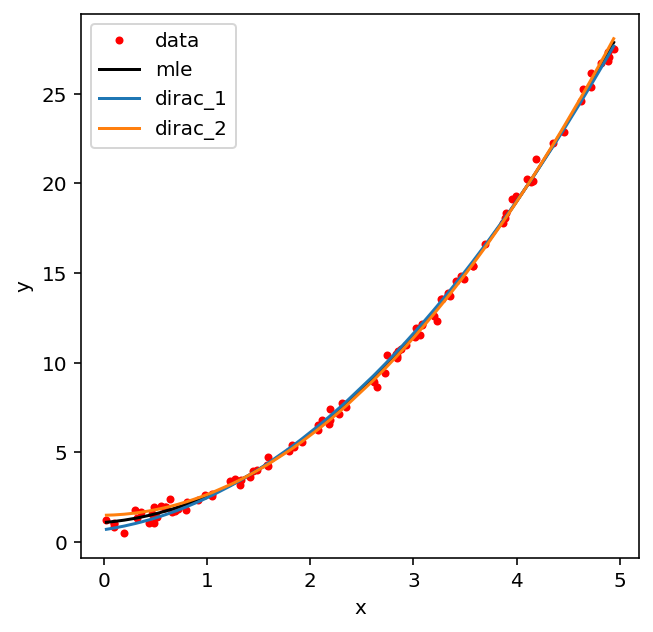

In [264]:
fig = plt.figure(figsize=(5,5))
plt.plot(x_s, y, ".r", label="data")

plt.plot(np.sort(x_s), forward_model(S[0], np.sort(x_s)), "-k", label=f"mle")
plt.plot(np.sort(x_s), forward_model(S[2], np.sort(x_s)), "-", label=f"dirac_{1}")
plt.plot(np.sort(x_s), forward_model(S[3], np.sort(x_s)), "-", label=f"dirac_{2}")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
